# Correlation analysis

## Libraries and settings

In [1]:
# Libraries
import os
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show path to the current working directory
print('Current working directory:', os.getcwd())

Current working directory: /Users/miroduman/Desktop/data analytics/week_7


## Import the apartment data

In [2]:
# Define columns
columns = ['web-scraper-order',
           'bfs_number',
           'bfs_name',
           'lat',
           'lon',
           'rooms',
           'area',
           'price',
           'price_per_m2',
           'pop',
           'pop_dens',
           'frg_pct',
           'emp',
           'tax_income']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[columns]


# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,web-scraper-order,bfs_number,bfs_name,lat,lon,rooms,area,price,price_per_m2,pop,pop_dens,frg_pct,emp,tax_income
0,1662023695-433,112,Bubikon,47.255714,8.804976,3.5,122.0,3180,26.07,7344,632.558140,11.410675,3617.0,79385.904340
1,1662023720-634,112,Bubikon,47.254879,8.793746,4.0,87.0,1690,19.43,7344,632.558140,11.410675,3617.0,79385.904340
2,1662023745-834,112,Bubikon,47.277386,8.800306,3.5,92.0,2350,25.54,7344,632.558140,11.410675,3617.0,79385.904340
3,1662023701-503,112,Bubikon,47.277386,8.800306,3.5,130.0,2500,19.23,7344,632.558140,11.410675,3617.0,79385.904340
4,1662023745-820,261,Zürich,47.361378,8.533339,2.5,78.0,3760,48.21,420217,4778.994655,32.458468,491193.0,82932.737704


## Scatterplot-matrix

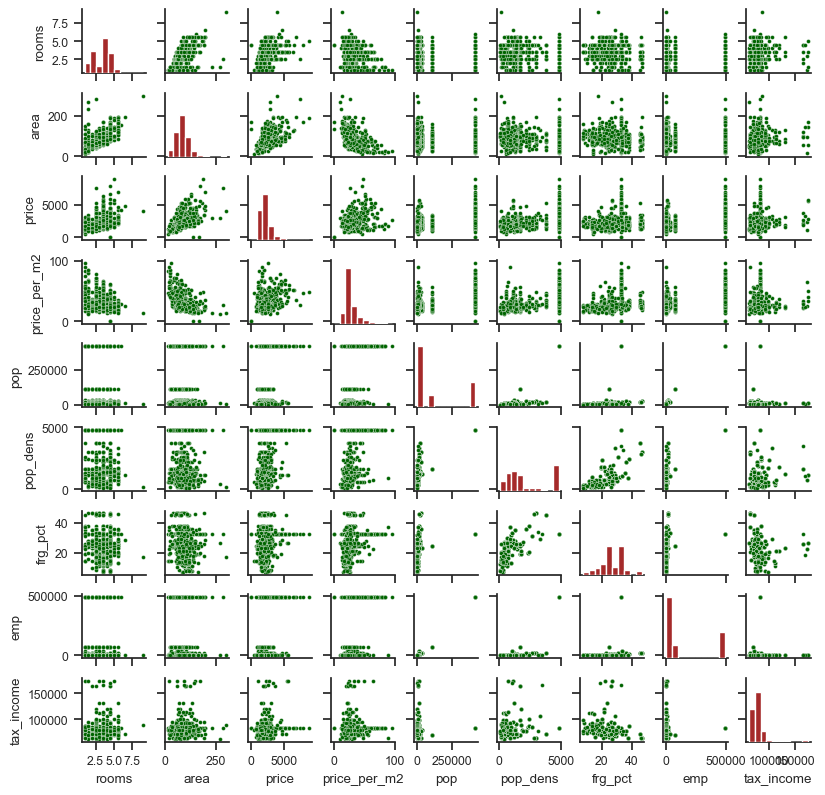

In [3]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms',
                     'area',
                     'price',
                     'price_per_m2',
                     'pop',
                     'pop_dens',
                     'frg_pct',
                     'emp',
                     'tax_income']], 
                 height=0.9, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=8)
g.map_lower(sns.scatterplot, color='darkgreen', s=8)
g.map_diag(plt.hist, color='brown')

## Scatterplots and Pearson correlation of selected variables

### Scatterplot price versus area

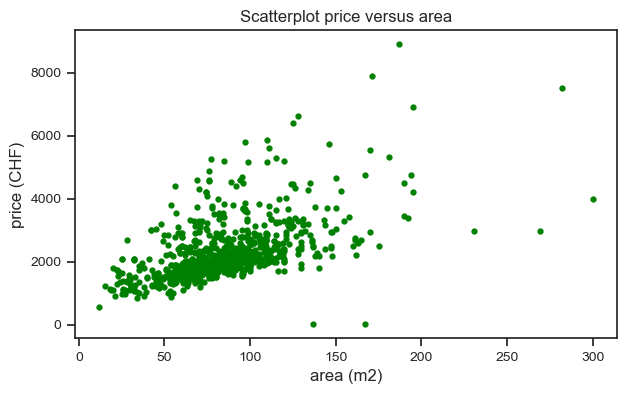

In [4]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price versus area', fontsize=12)
plt.ylabel('price (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price versus area

In [5]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): 0.5484
p-value: 0.0000


### Scatterplot price_per_m2 versus area

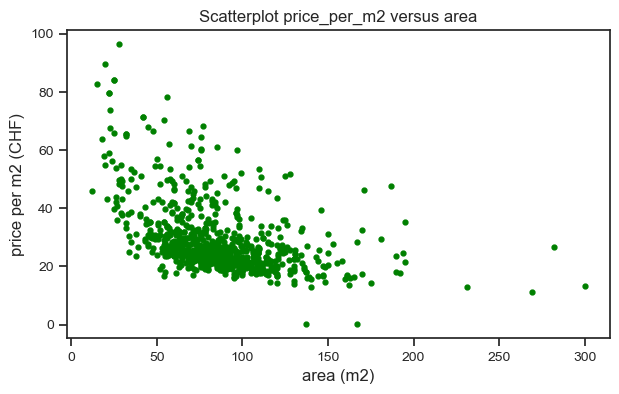

In [6]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price_per_m2'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price_per_m2 versus area', fontsize=12)
plt.ylabel('price per m2 (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price_per_m2 versus area

In [7]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.4642
p-value: 0.0000


### Log-transform price_per_m2 and area to make the relationship linear

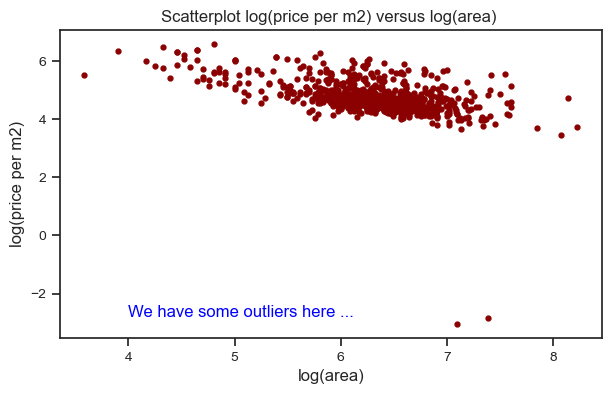

In [8]:
# Transform values of price_per_m2 to make it linear
df['log_price_per_m2'] = np.log2(df['price_per_m2'])
df['log_area'] = np.log2(df['area'])

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['log_area'], 
         df['log_price_per_m2'], 
         'o', 
         markersize=3.5,
         color="darkred")

# Add title and axes labels
plt.title('Scatterplot log(price per m2) versus log(area) ', fontsize=12)
plt.ylabel('log(price per m2)', fontsize=12)
plt.xlabel('log(area)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Add text annotation
plt.text(4, -2.8, s="We have some outliers here ...", fontsize=12, color="blue")

plt.show()

### Pearson correlation log(price_per_m2) versus log(area)

In [9]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['log_area'], df['log_price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.5033
p-value: 0.0000


## Correlation analysis based on car data

### Import car data

In [10]:
import pandas as pd

# Define columns for import
columns = ['Offer_Id',
          'Type',
          'Init_Regist',
          'Kilometer',
          'Price_Num',
          'PS_Num']

# Read the data and show header info
df_cars = pd.read_csv('autoscout24_data.csv', sep=";")[columns]

# Kilometer to numeric value
df_cars['Kilometer_Num'] = df_cars['Kilometer'].str.replace(' km', '').str.replace('\'', '').astype('int64')

# Remove original column 'Kilometer' 
df_cars = df_cars.drop(columns=['Kilometer'])

# Rename columns
df_cars = df_cars.rename(columns={'Price_Num':'Price', 'PS_Num':'PS', 'Kilometer_Num':'Kilometer'})
print('Number of rows and columns:', df_cars.shape)

# print header info
df_cars

Number of rows and columns: (3980, 6)


,Offer_Id,Type,Init_Regist,Price,PS,Kilometer
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,10.2014,22500,245,75000
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),6.2013,23749,184,46655
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,6.2011,18500,306,138955
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,8.2015,36000,360,43000
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,9.2018,48500,252,43300
...,...,...,...,...,...,...
3975,7137137,FERRARI F360 Spider (Cabriolet),2.2002,58400,400,78000
3976,6758841,MERCEDES-BENZ SL 500 560 SL (Cabriolet),1.1987,15900,232,315000
3977,7461330,MERCEDES-BENZ CL 63 AMG 7G-Tronic (Coupé),8.2007,42000,525,85000
3978,7005403,BMW 328i Cabrio (Cabriolet),8.1995,9980,193,188920


## Scatterplot

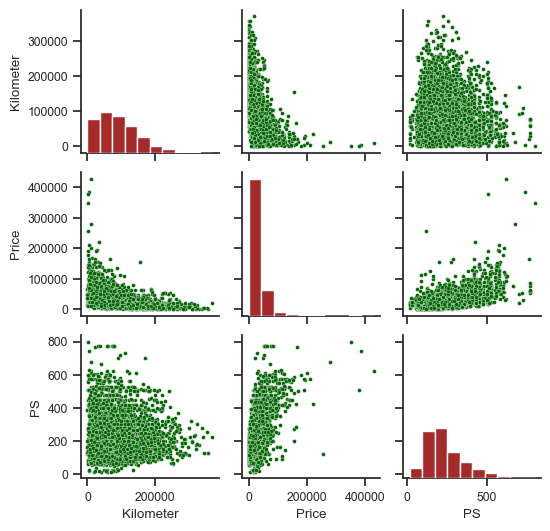

In [13]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_cars[[
          'Kilometer',
          'Price',
          'PS']], 
                 height=1.8, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=8)
g.map_lower(sns.scatterplot, color='darkgreen', s=8)
g.map_diag(plt.hist, color='brown')

## Perform correlation analyses inclusive significance tests for the variables: 

In [14]:
# Perform Price correlation
res = scipy.stats.pearsonr(df_cars['Price'], df_cars['Kilometer'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.4341
p-value: 0.0000


In [15]:
# Perform PS correlation
res = scipy.stats.pearsonr(df_cars['Price'], df_cars['PS'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): 0.6171
p-value: 0.0000


In [16]:
# Perform Kilometer correlation
res = scipy.stats.pearsonr(df_cars['PS'], df_cars['Kilometer'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.1282
p-value: 0.0000


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')